In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# Manual Time Domain Convolution

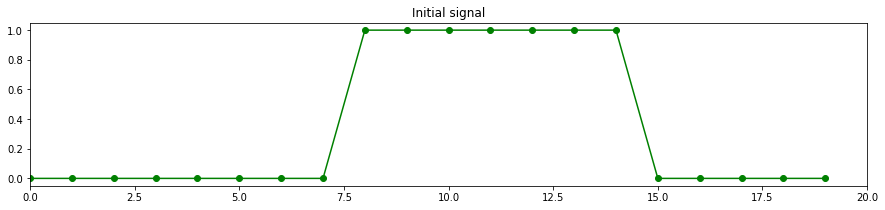

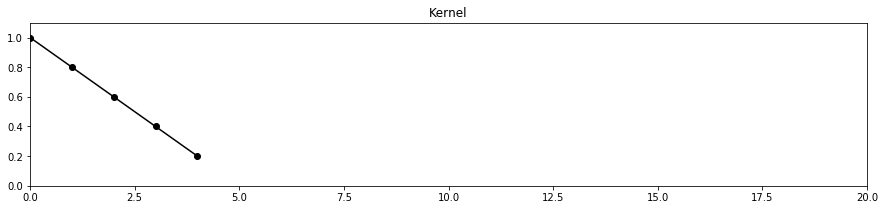

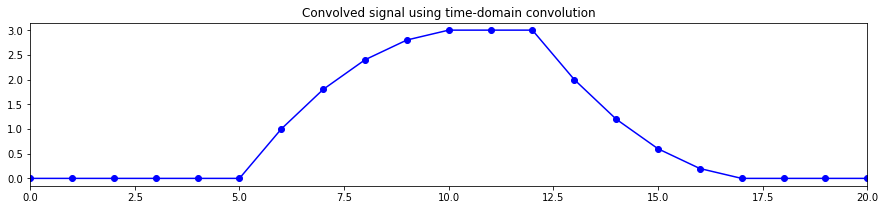

In [12]:
# MANUAL TIME-DOMAIN CONVOLUTION

init_signal = np.zeros(20)
init_signal[8:15] = 1

kernel = [1, 0.8, 0.6, 0.4, 0.2]

conv_size = len(init_signal) + len(kernel) - 1

# convolved_signal = 

# Plotting
plt.figure(figsize=(15, 3))
plt.plot(init_signal, 'go-')
plt.xlim([0, len(init_signal)])
plt.title('Initial signal')
plt.show()

plt.figure(figsize=(15, 3))
plt.plot(kernel, 'ko-')
plt.xlim([0, len(init_signal)])
plt.ylim([0, 1.1])
plt.title('Kernel')
plt.show()

half_kernel_size = int(len(kernel) / 2)
# Signal is padded because center of kernel should go through each point in init signal, meaning additional
# elements are needed on the sides
padded_init_signal = np.concatenate((np.zeros(half_kernel_size), init_signal, np.zeros(half_kernel_size)))
# For convolution kernel is always fllipped
flipped_kernel = np.flip(kernel)
convolved_signal = np.zeros(conv_size)
for i in range(half_kernel_size, conv_size - half_kernel_size):
    convolved_signal[i - half_kernel_size:i + half_kernel_size + 1] = \
        np.dot(padded_init_signal[i - half_kernel_size:i + half_kernel_size + 1], flipped_kernel)

plt.figure(figsize=(15, 3))
plt.plot(convolved_signal, 'bo-')
plt.xlim([0, len(init_signal)])
plt.title('Convolved signal using time-domain convolution')
plt.show()


# Frequency Domain Convolution

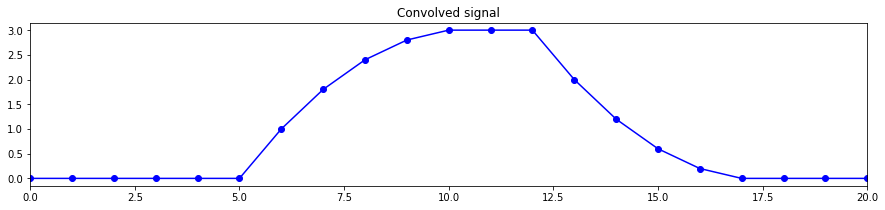

In [10]:
# FREQUENCY DOMAIN CONVOLUTION

init_signal_fft = np.fft.fft(init_signal, conv_size)
kernel_fft = np.fft.fft(kernel, conv_size)

frequency_convolution = init_signal_fft * kernel_fft
convolved_signal = np.fft.ifft(frequency_convolution)
convolved_signal = convolved_signal[half_kernel_size:-half_kernel_size + 1]

plt.figure(figsize=(15, 3))
plt.plot(convolved_signal, 'bo-')
plt.xlim([0, len(init_signal)])
plt.title('Convolved signal using frequency domain convolution (easier)')
plt.show()
